## Kelompok 6 - Final Project 3
### Heart Failure Prediction
"Prediksi keselamatan pasien dari penyakit jantung"

**Anggota:**\
**1. Yona Ade Hermawan - PYTN_KS09_008**\
**2. Cindo Fara Aqsyada Agatha - PYTN_KS09_013**\
**3. Stephanie Marceline Raintung - PYTN_KS09_017**

## a. INTRODUCTION
- Jumlah dataset : 299 ROW & 13 COLUMN
- Sumber Dataset : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?resource=download
- Tujuannya:
Untuk memprediksi keselamatan pasien dari penyakit jantung

## b. IMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

## c. DATA LOADING 
Pada Tahap Data Loading, hal yang dilakukan adalah :
- Mengimpor dataset
- Menampilkan tabel dataset (teratas dan terbawah)
- Melihat jumlah baris dan kolom
- Melihat informasi tiap variabel

In [2]:
# Mengimpor dataset
df = pd.read_csv("heart_failure.xls")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# menampilkan 4 dataset teratas
df.head(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1


In [4]:
# menampilkan 4 dataset terbawah
df.tail(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
# melihat jumlah baris dan kolom
df.shape

(299, 13)

Terdapat **299 Baris** dan **13 Kolom**

In [6]:
#melihat informasi setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## d. DATA CLEANING
Pada tahap data cleaning, hal yang dilakukan adalah :
- Mengecek missing value
- Cek duplikasi data

In [8]:
#mengecek missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada **Missing Value**

In [9]:
#cek duplikasi data
df.duplicated().any()

False

Tidak ada data yang **terduplikasi**

## e. DATA EXPLORATION
- Dalam Data Exploration, kami melakukan beberapa analisis untuk mengetahui hubungan korelasi dengan variabel Death Event, diantaranya :
- Analisis Jenis Kelamin (Sex) Pasien, Analisis Usia Pasien, Analisis Mengenai 'Diabetes', Analisis Mengenai 'Anemia', Analisis mengenai High Blood Pressure (Tekanan Darah Tinggi), Analisis Mengenai Creatinine Phosphokinase (CPK), Analisis Mengenai Ejection Fraction (EF), Analisis Mengenai Platelets (Trombosit), Analisis Serum Creatinine, Analisis Mengenai Serum Sodium, Analisis Smoking, Analisis Death Event, dan Analisis Time

**Mengubah variabel numerik** menjadi **categorical** untuk mempermudah penyampaian interpretasi dalam analisis dan visualisasi data

In [10]:
# mengubah data numerik menjadi categorical
df_eda = pd.DataFrame()

df_eda["age"] = df["age"]
df_eda["anaemia"] = np.where(df["anaemia"] < 1, "no", "yes")
df_eda["creatinine_phosphokinase"] = df["creatinine_phosphokinase"]
df_eda["diabetes"] = np.where(df["diabetes"] < 1, "no", "yes")
df_eda["ejection_fraction"] = df["ejection_fraction"]
df_eda["high_blood_pressure"] = np.where(df["high_blood_pressure"] < 1, "no", "yes")
df_eda["platelets"] = df["platelets"]
df_eda["serum_creatinine"] = df["serum_creatinine"]
df_eda["serum_sodium"] = df["serum_sodium"]
df_eda["sex"] = np.where(df["sex"] < 1, "female", "male")
df_eda["smoking"] = np.where(df["smoking"] < 1, "no", "yes")
df_eda["time"] = df["time"]
df_eda["death_event"] = np.where(df["DEATH_EVENT"] < 1, "no", "yes")

df_eda.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,no,582,no,20,yes,265000.00,1.9,130,male,no,4,yes
1,55.0,no,7861,no,38,no,263358.03,1.1,136,male,no,6,yes
2,65.0,no,146,no,20,no,162000.00,1.3,129,male,yes,7,yes
3,50.0,yes,111,no,20,no,210000.00,1.9,137,male,no,7,yes
4,65.0,yes,160,yes,20,no,327000.00,2.7,116,female,no,8,yes


### 1. Analisis Jenis Kelamin (Sex) Pasien

### 1.1 Lebih Banyak Pasien Pria atau Wanita?

In [11]:
sex = df_eda["sex"].value_counts(normalize=True)*100

In [12]:
sex

male      64.882943
female    35.117057
Name: sex, dtype: float64

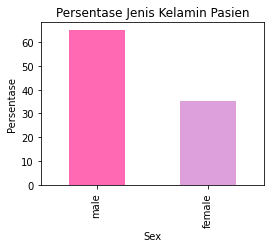

In [13]:
sex.plot(kind='bar', figsize=(4,3), color=['hotpink','plum'])

plt.title('Persentase Jenis Kelamin Pasien')
plt.xlabel('Sex')
plt.ylabel('Persentase')

plt.show()

**Interpretasi :**
- Keterangan : 0 = wanita, 1 = pria
- Persentase pasien pria ada 64.88%
- Persentase pasien wanita ada 35.11%

### 1.2 Bagaimana Persentase Death Event Pada Pasien Wanita dan Pria?

In [14]:
df5 = df[(df["sex"] == 0) & (df["DEATH_EVENT"] == 1)]
df6 = df[(df["sex"] == 1) & (df["DEATH_EVENT"] == 1)]
sex_death = pd.concat([df5, df6])

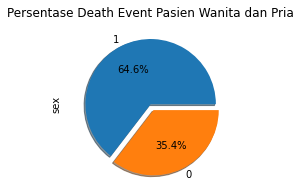

In [15]:
fig, ax = plt.subplots(figsize=(15, 3))

sex_death["sex"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax, shadow=True, explode=[0, 0.1])
ax.set_title('Persentase Death Event Pasien Wanita dan Pria')

plt.show()

**Interpretasi :**
- Keterangan :
0 = Wanita, 1 = Pria
- 64,6% pasien pria meninggal
- 35,4% pasien wanita meninggal

### 2. Analisis Usia Pasien

### 2.2 Usia Max, Min, dan Mean Pasien?

In [16]:
# usia maksimal pasien
age_max = df["age"].max()
age_max

95.0

In [17]:
# usia minimal pasien
age_min = df["age"].min()
age_min

40.0

In [18]:
# usia rata-rata pasien
age_mean = df["age"].mean()
age_mean

60.83389297658862

**Interpretasi :**
- Usia maksimal pasien 95 tahun
- Usia minimum pasien 40 tahun
- Rata-rata usia pasien 60 tahun

### 2.3 Apakah Age berpengaruh terhadap Death Event?

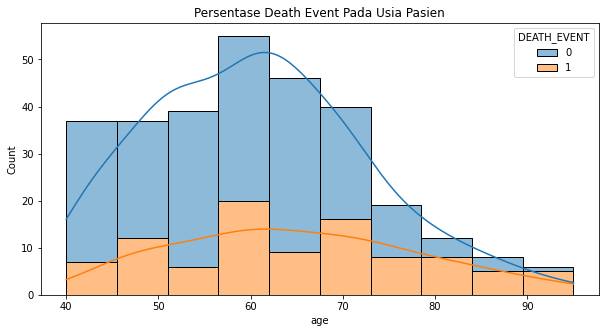

In [83]:
fig, ax = subplts()

plot_hist_hue("age", "DEATH_EVENT", ax)
ax.set_title('Persentase Death Event Pada Usia Pasien')
plt.show()

**Interpretasi:**
- Berdasarkan visualisasi data diatas, semakin bertambah usia, lebih banyak jumlah pasien yang meninggal (seperti pada usia 60 dan 70-an). 
- Sehingga Usia (Age) berpengaruh terhadap Death Event.

### 3. Analisis Mengenai 'Diabetes'

### 3.1 Berapa persentase pasien yang mengidap diabetes?

In [19]:
diabetes = df_eda['diabetes'].value_counts(normalize=True)*100

In [20]:
diabetes

no     58.19398
yes    41.80602
Name: diabetes, dtype: float64

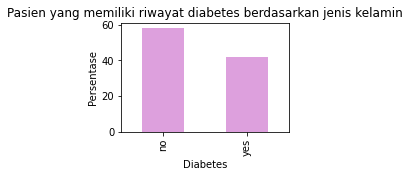

In [21]:
diabetes.plot(kind='bar', figsize=(3,2), color='plum',legend=None)
plt.title('Pasien yang memiliki riwayat diabetes berdasarkan jenis kelamin')
plt.xlabel('Diabetes')
plt.ylabel('Persentase')
plt.show()

**Interpretasi :**
- Terdapat 58.2% Pasien yang tidak memiliki riwayat penyakit diabetes
- 41.8% Pasien yang memiliki riwayat penyakit diabetes

### 3.2 Apakah Mengidap Diabetes berpengaruh terhadap Death Event?

In [22]:
df_eda[4:5]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
4,65.0,yes,160,yes,20,no,327000.0,2.7,116,female,no,8,yes


- Tabel diatas merupakan data pasien yang mengidap **Diabetes** dan **meninggal**.
- Sehingga, **Diabetes** **berpengaruh** terhadap Death Event.

### 3.3 Apakah pasien yang mengidap Diabetes mempunyai presentase kematian (Death Event) yang tinggi?

In [23]:
df1 = df[(df["diabetes"] == 0) & (df["DEATH_EVENT"] == 1)]
df2 = df[(df["diabetes"] == 1) & (df["DEATH_EVENT"] == 1)]

diabetes_death = pd.concat([df1, df2])

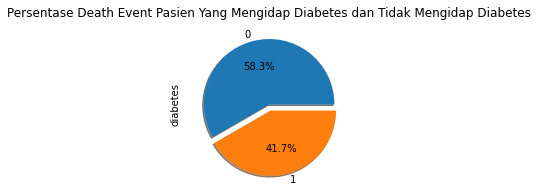

In [24]:
fig, ax = plt.subplots(figsize=(15, 3))

diabetes_death["diabetes"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax, shadow=True, explode=[0, 0.1])
ax.set_title('Persentase Death Event Pasien Yang Mengidap Diabetes dan Tidak Mengidap Diabetes')
plt.show()

**Interpretasi :**
- Keterangan :
0 = tidak mengidap penyakit diabetes, 1 = mengidap penyakit diabetes
- Terdapat 58,3% pasien yang tidak mengidap penyakit diabetes meninggal
- Terdapat 41,7% pasien yang mengidap penyakit diabetes meninggal
- Sehingga, pasien yang tidak mengidap diabetes memiliki presentase meninggal lebih tinggi.

### 4. Analisis Mengenai 'Anemia'

### 4.1 Berapa persentase pasien yang memiliki anemia?

In [25]:
anaemia = df_eda["anaemia"].value_counts(normalize=True)*100

In [26]:
anaemia

no     56.856187
yes    43.143813
Name: anaemia, dtype: float64

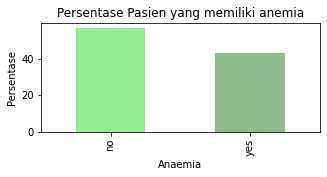

In [27]:
anaemia.plot(kind='bar', figsize=(5,2), color=['lightgreen','darkseagreen'])

plt.title('Persentase Pasien yang memiliki anemia')
plt.xlabel('Anaemia')
plt.ylabel('Persentase')

plt.show()

**Interpretasi :**
- Ada 43.14% Pasien yang mengidap anaemia
- Ada 56.85% Pasien yang tidak mengidap anaemia

### 4.2 Apakah Mengidap Anemia berpengaruh terhadap Death Event?

In [28]:
df_eda[4:5]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
4,65.0,yes,160,yes,20,no,327000.0,2.7,116,female,no,8,yes


- Tabel diatas merupakan data pasien yang mengidap **Anemia** dan **meninggal**.
- Sehingga, **Anemia** **berpengaruh** terhadap Death Event.

### 4.3 Apakah pasien yang mengidap Anemia mempunyai presentase kematian (Death Event) yang tinggi?

In [29]:
df1 = df[(df["anaemia"] == 0) & (df["DEATH_EVENT"] == 1)]
df2 = df[(df["anaemia"] == 1) & (df["DEATH_EVENT"] == 1)]

df_anemia_death = pd.concat([df1, df2])

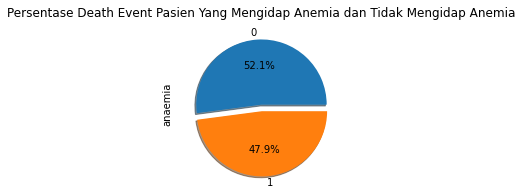

In [30]:
fig, ax = plt.subplots(figsize=(15, 3))

df_anemia_death["anaemia"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax, shadow=True, explode=[0, 0.1])
ax.set_title('Persentase Death Event Pasien Yang Mengidap Anemia dan Tidak Mengidap Anemia')
plt.show()

**Interpretasi :**
- Keterangan :
0 = tidak mengidap penyakit anemia, 1 = mengidap penyakit anemia
- 52,1% pasien yang tidak mengidap penyakit anemia meninggal
- 47,9% pasien yang mengidap penyakit anemia dan meninggal
- Sehingga, pasien yang tidak mengidap anemia mempunyai presentase meninggal lebih tinggi.

### 5. Analisis mengenai High Blood Pressure (Tekanan Darah Tinggi)

### 5.1 Berapa persentase pasien yang memiliki High Blood Pressure (Tekanan Darah Tinggi)?

In [31]:
highbloodpressure = df_eda["high_blood_pressure"].value_counts(normalize=True)*100

In [32]:
highbloodpressure

no     64.882943
yes    35.117057
Name: high_blood_pressure, dtype: float64

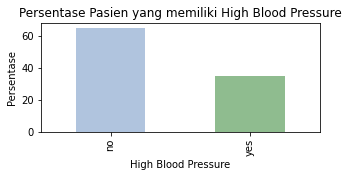

In [33]:
highbloodpressure.plot(kind='bar', figsize=(5,2), color=['lightsteelblue','darkseagreen'])

plt.title('Persentase Pasien yang memiliki High Blood Pressure')
plt.xlabel('High Blood Pressure')
plt.ylabel('Persentase')

plt.show()

**Interpretasi :**
- Terdapat 64.9% pasien yang tidak memiliki High Blood Pressure
- Terdapat 35.1% pasien yang memiliki tekanan High Blood Pressure

### 5.2 Apakah Mengidap High Blood Pressure berpengaruh terhadap Death Event?

In [34]:
df_eda[0:1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,no,582,no,20,yes,265000.0,1.9,130,male,no,4,yes


- Tabel diatas merupakan data pasien yang mengidap **High Blood Pressure** dan **meninggal**.
- Sehingga, **High Blood Pressure** **berpengaruh** terhadap Death Event.

### 5.3 Apakah pasien yang mengidap High Blood Pressure mempunyai presentase kematian (Death Event) yang tinggi?

In [35]:
df3 = df[(df["high_blood_pressure"] == 0) & (df["DEATH_EVENT"] == 1)]
df4 = df[(df["high_blood_pressure"] == 1) & (df["DEATH_EVENT"] == 1)]

highblood_death = pd.concat([df3, df4])

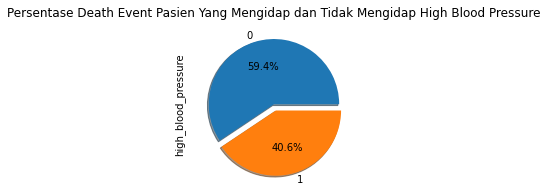

In [36]:
fig, ax = plt.subplots(figsize=(15, 3))

highblood_death["high_blood_pressure"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax, shadow=True, explode=[0, 0.1])
ax.set_title('Persentase Death Event Pasien Yang Mengidap dan Tidak Mengidap High Blood Pressure')

plt.show()

**Interpretasi :**
- Keterangan :
0 = tidak mengidap High Blood Pressure, 1 = mengidap penyakit High Blood Pressure
- Ada 58,4% pasien yang tidak mengidap penyakit High Blood Pressure meninggal
- Ada 40,6% pasien yang mengidap penyakit High Blood Pressure meninggal
- Sehingga, pasien yang tidak mengidap penyakit High Blood Pressure memiliki presentase meninggal lebih tinggi

### 6. Analisis Mengenai Creatinine Phosphokinase (CPK) 

### 6.1 Rata-rata level Enzim Creatinine Phosphokinase (CPK) yang dimiliki pasien

In [37]:
df["creatinine_phosphokinase"].mean()

581.8394648829432

**Rata-rata** Level Enzim Creatinine Phosphokinase (CPK) yang dimiliki pasien yaitu **582 mcg/L**

### 6.2 Apakah Level Enzim Creatinine Phosphokinase (CPK) yang tinggi berpengaruh terhadap Death Event?

Melihat data pasien dengan Level **Creatinine Phosphokinase** (CPK) **tertinggi**

In [38]:
cpk_max_val = np.amax(df["creatinine_phosphokinase"].values)

df_eda[df_eda["creatinine_phosphokinase"] == cpk_max_val]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
1,55.0,no,7861,no,38,no,263358.03,1.1,136,male,no,6,yes


- **Creatine Phosphokinase (CPK)** adalah  adalah **enzim** yang ditemukan dalam **jaringan otot rangka dan serat jantung.**
- Total Kadar normalnya adalah **10 hingga 120 mikrogram per liter (mcg/L)**
- Tabel diatas merupakan data pasien dengan **Level Enzim Creatine Phosphokinase (CPK) tertinggi (7.861 mcg/L)** dan **meninggal**.
- Sehingga, **Level Enzim Creatine Phosphokinase (CPK) yang tinggi** atau melebihi batas normal **berpengaruh** terhadap Death Event.

### 7. Analisis Mengenai Ejection Fraction (EF)

### 7.1 Bagaimana Rata-rata Presentase Ejection Fraction (EF) yang dimiliki pasien?

In [39]:
df["ejection_fraction"].mean()

38.08361204013378

**Rata-rata** Presentase Ejection Fraction (EF) yang dimiliki pasien yaitu **38%**

### 7.2 Apakah presentase Ejection Fraction (EF) yang rendah dan tinggi berpengaruh terhadap Death Event?

Melihat data pasien dengan tingkat **Ejection Fraction (EF)** **terendah**

In [40]:
min_ef = np.amin(df["ejection_fraction"])

df_eda[df_eda["ejection_fraction"] == min_ef]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
17,45.0,no,582,no,14,no,166000.0,0.8,127,male,no,14,yes


Melihat data pasien dengan tingkat **Ejection Fraction (EF)** **tertinggi**

In [41]:
max_ef = np.amax(df["ejection_fraction"].values)

df_eda[df_eda["ejection_fraction"] == max_ef]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
64,45.0,no,582,no,80,no,263358.03,1.18,137,female,no,63,no


- Ejection Fraction (EF) Normalnya memiliki nilai berkisar antara **50-70%**. 
- Tabel pertama merupakan data pasien dengan **Tingkat EF Terendah (14%)** dan **meninggal**.
- Namun, Pada Tabel kedua merupakan data pasien dengan **Tingkat EF Tertinggi (80%)** dan **tidak meninggal**
- Jadi bisa ada **korelasi negatif** antara **Ejection Fraction (EF)** dan **DEATH_EVENT**.

### 7.3 Analisis Ejection Fraction (EF) dengan Death Event

In [42]:
# for subplots
def subplts(r=1, c=1, fs=(10, 5)):
    return plt.subplots(r, c, figsize=fs)

# histogram with hue
def plot_hist_hue(x, hu, ax, d=df, multi="stack", kde=True, log=False):
    sns.histplot(data=d, x=x, ax=ax, hue=hu, kde=kde, multiple=multi, log_scale=log)
    
# boxplot with one categorical
def plot_boxcat(x, y, ax, d=df):
    sns.boxplot(data=d, x=x, y=y, ax=ax)

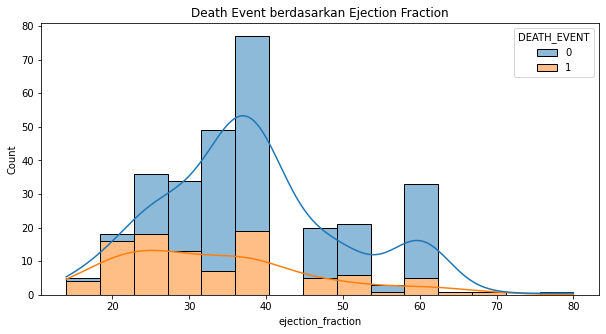

In [90]:
fig, ax = subplts()

plot_hist_hue("ejection_fraction", "DEATH_EVENT", ax)
ax.set_title('Death Event berdasarkan Ejection Fraction')

plt.show()

- Berdasarkan visualisasi data diatas, 
- Persentase Ejection Fraction (EF) 20 keatas tidak meninggal,
- Sedangkan Persentase Ejection Fraction (EF) 20 kebawah meninggal

- Ini menunjukkan bahwa rata-rata orang dengan Persentase Ejection Fraction (EF) lebih tinggi bertahan lebih lama daripada orang dengan Persentase Ejection Fraction (EF) lebih rendah.

### 8. Analisis Mengenai Platelets (Trombosit)

### 8.1 Bagaimana Rata-rata Kadar Platelets yang dimiliki pasien?

In [44]:
df["platelets"].mean()

263358.02926421404

**Rata-rata** Kadar Platelets (Trombosit) yang dimiliki pasien yaitu **263.358 kiloplatelets/mL**

### 8.2 Apakah kadar platelets yang kurang dari batas normal berpengaruh terhadap Death Event?

Melihat Data Pasien dengan **Kadar Platelets** (Trombosit) **Terendah**

In [45]:
min_platelet = np.amin(df["platelets"])

df_eda[df_eda["platelets"] == min_platelet]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
277,70.0,no,582,yes,38,no,25100.0,1.1,140,male,no,246,no


- **Kadar Platelets** (trombosit) **normal** dalam darah adalah sekitar **150.000–450.000/mL**.
- Pada data diatas, **pasien tidak meninggal** meskipun kadar Platelets-nya **kurang dari batas normal**
- Sehingga, bisa ada **korelasi negatif** antara Platelets (Trombosit) dan DEATH_EVENT.

### 9. Analisis Serum Creatinine

### 9.1 Bagaimana Rata-rata level serum creatinine pada pasien?

In [46]:
df["serum_creatinine"].mean()

1.3938795986622072

**Rata-rata** level serum creatinine pada pasien yaitu **1.4 mg/dL**

### 9.2 Apakah level serum creatinine yang lebih dari batas normal berpengaruh terhadap Death Event?

In [47]:
max_sc = np.amax(df["serum_creatinine"].values)

df_eda[df_eda["serum_creatinine"] == max_sc]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
9,80.0,yes,123,no,35,yes,388000.0,9.4,133,male,yes,10,yes


- Nilai normal serum creatinine berkisar **0,6-1,2 mg/dL pada pria**, dan **0,5-1,1 mg/dL pada wanita**.
- Pada tabel diatas, **level serum creatinine** pada pasien melebih level normal **(9,4 mg/dL)** dan **meninggal**.
- Jadi, **level serum creatinine** yang **lebih** dari batas normal **berpengaruh** terhadap Death Event.

### 10. Analisis Mengenai Serum Sodium

### 10.1 Bagaimana Rata-rata level serum sodium pada pasien?

In [48]:
df["serum_sodium"].mean()

136.62541806020067

**Rata-rata** level serum sodium pada pasien yaitu **137 mEq/L**

### 10.2 Apakah level serum sodium yang lebih atau kurang dari batas normal berpengaruh terhadap Death Event?

**Menampilkan data pasien dengan level Serum Sodium Tertinggi**

In [49]:
max_sd = np.amax(df["serum_sodium"].values)

df_eda[df_eda["serum_sodium"] == max_sd]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
236,75.0,no,119,no,50,yes,248000.0,1.1,148,male,no,209,no


**Menampilkan data pasien dengan level Serum Sodium Terendah**

In [50]:
min_sd = np.amin(df["serum_sodium"])

df_eda[df_eda["serum_sodium"] == min_sd]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
199,60.0,no,1211,yes,35,no,263358.03,1.8,113,male,yes,186,no


- Rata-rata level serum sodium pada pasien berkisar antara **135-145 milliequivalents per liter (mEq/L)**.
- Pada tabel diatas, level serum sodium pada pasien yang **melebihi level normal (148 mEq/L)** tidak meninggal.
- Begitu juga dengan level serum sodium pada pasien yang **kurang dari level normal (113 mEq/L)** tidak meninggal.
- Jadi, level serum sodium yang lebih dari batas normal ataupun kurang dari batas normal **tidak terlalu berpengaruh** pada Death Event.

### 11. Analisis Smoking

### 11.1 Ada berapa persen pasien yang merokok?

In [51]:
smoking = df_eda["smoking"].value_counts(normalize=True)*100

In [52]:
smoking

no     67.892977
yes    32.107023
Name: smoking, dtype: float64

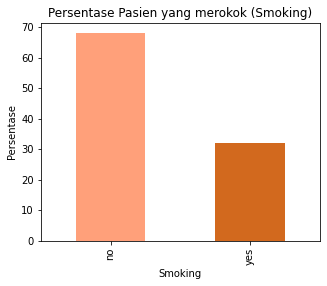

In [54]:
smoking.plot(kind='bar', figsize=(5,4), color=['lightsalmon','chocolate'])

plt.title('Persentase Pasien yang merokok (Smoking)')
plt.xlabel('Smoking')
plt.ylabel('Persentase')

plt.show()

**Interpretasi:**
- Terdapat 67,9% pasien yang tidak merokok
- Terdapat 32,1% pasien yang merokok
- Presentase pasien yang tidak merokok lebih banyak dibandingkan pasien yang merokok

### 11.2 Apakah Merokok berpengaruh terhadap Death Event?

**Menampilkan Data Pasien Yang Merokok**

In [55]:
df_eda[2:3]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
2,65.0,no,146,no,20,no,162000.0,1.3,129,male,yes,7,yes


**Menampilkan Data Pasien Yang Juga Merokok**

In [56]:
df_eda[298:299]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
298,50.0,no,196,no,45,no,395000.0,1.6,136,male,yes,285,no


- Tabel pertama merupakan data pasien yang **Merokok** dan **meninggal**.
- Tapi pada Tabel kedua merupakan data pasien yang **Merokok**, namun **tidak meninggal**.
- Sehingga, bisa ada korelasi negatif antara Smoking dan DEATH EVENT.

### 11.3 Bagaimana Persentase Death Event Pada Pasien Yang Merokok & Tidak Merokok?

In [57]:
df7 = df[(df["smoking"] == 0) & (df["DEATH_EVENT"] == 1)]
df8 = df[(df["smoking"] == 1) & (df["DEATH_EVENT"] == 1)]
smoking_death = pd.concat([df7, df8])

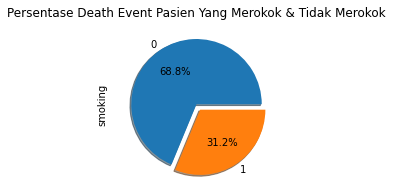

In [58]:
fig, ax = plt.subplots(figsize=(15, 3))

smoking_death["smoking"].value_counts().plot.pie(autopct="%1.1f%%", ax=ax, shadow=True, explode=[0, 0.1])
ax.set_title('Persentase Death Event Pasien Yang Merokok & Tidak Merokok')

plt.show()

**Interpretasi :**
- Keterangan :
0 = Tidak Merokok, 1 = Merokok
- Terdapat 68,8% pasien yang tidak merokok meninggal
- Terdpat 31,2% pasien yang merokok meninggal
- Sehingga presentase pasien yang tidak merokok meninggal lebih banyak dibandingkan pasien yang merokok.

### 12. Analisis Waktu Follow Up (Time) per pasien

### 12.1 Max, Min, Mean Waktu Follow Up Pasien?

In [59]:
df['time'].max()

285

In [60]:
df['time'].min()

4

In [61]:
df['time'].mean()

130.2608695652174

**Interpretasi:**
- Waktu Follow Up terbanyak : 285 Hari
- Waktu Follow Up terendah : 4 Hari
- Rata-rata Waktu Follow Up Pasien : 130 Hari

### 12. 1 Apakah Waktu Follow Up (Time) berpengaruh pada Death Event?

Menampilkan **Waktu Follow Up** (Time) Pasien **Terendah**

In [62]:
time_min = np.amin(df["time"])

df_eda[df_eda["time"] == time_min]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,no,582,no,20,yes,265000.0,1.9,130,male,no,4,yes


Menampilkan **Waktu Follow Up** (Time) Pasien **Tertinggi**

In [63]:
time_max = np.amax(df["time"].values)

df_eda[df_eda["time"] == time_max]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
298,50.0,no,196,no,45,no,395000.0,1.6,136,male,yes,285,no


- Tabel pertama merupakan Waktu Follow Up (Time) Pasien Terendah (4) dan **meninggal**.
- Tabel kedua merupakan Waktu Follow Up (Time) Pasien Tertinggi (285), namun **tidak meninggal**.

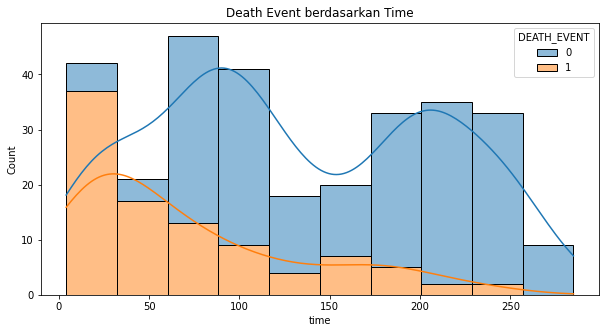

In [89]:
fig, ax = subplts()

plot_hist_hue("time", "DEATH_EVENT", ax)
ax.set_title('Death Event berdasarkan Time')

plt.show()

**Interpretasi**
- Pasien yang **Sedikit melakukan follow up** (time) memiliki rata-rata **kematian yang lebih besar** **daripada** Pasien yang **banyak melakukan follow up (time)**.
- Sehingga **Time** dan **Death Event** berkorelasi **negatif**.

### 13. Analisis Death Event

### 13.1 Bagaimana dengan Presentase Death Event Pasien?

In [65]:
death_event = df_eda["death_event"].value_counts(normalize=True)*100

In [66]:
death_event

no     67.892977
yes    32.107023
Name: death_event, dtype: float64

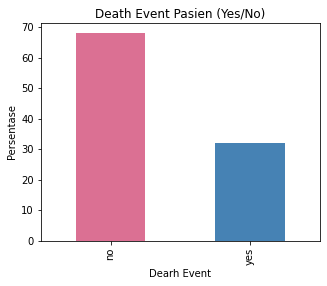

In [68]:
death_event.plot(kind='bar', figsize=(5,4), color=['palevioletred','steelblue'])

plt.title('Death Event Pasien (Yes/No)')
plt.xlabel('Dearh Event')
plt.ylabel('Persentase')

plt.show()

**Interpretasi:**
- Terdapat 67.9% pasien tidak meninggal
- Terdapat 32.1% pasien meninggal 
- Pasien yang tidak meninggal lebih banyak daripada pasien yang meninggal

### Melihat korelasi dari tiap variabel terhadap variabel Death Event

In [69]:
df_temp = df.copy()
cat_col_list = df_temp.columns[(df_temp.dtypes == 'object')].to_list()
for col in cat_col_list:
    df_temp[col] = preprocessing.LabelEncoder().fit_transform(df_temp[col])

In [70]:
# Melihat korelasi dari tiap variabel terhadap variabel Rain Tomorrow
df_temp.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

Berdasarkan korelasi tersebut, 
- Variabel yang berkorelasi positif adalah :
- serum_creatinine, age, high_blood_pressure, anaemia, creatinine_phosphokinase
- Variabel yang berkorelasi negatif adalah :
- time, ejection_fraction, serum_sodium, platelets, smoking, sex,diabetes

## f. DATA PREPROCESSING
Dalam tahap Data Preprocessing, hal yang dilakukan adalah :
- Deklarasi Variabel Fitur (X) dan Target (y)
- Split Data (80% training dan 20% testing)

### Deklarasi Variabel Fitur (X) dan Target (y)

In [71]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

### Split Data

In [72]:
# Split Data 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## g. PENDEFINISIAN MODEL
Dalam tahap Data Preprocessing, hal yang dilakukan adalah :
- Mendefinisikan Model Random Forest

In [73]:
randomforest = RandomForestClassifier()

## h. PELATIHAN MODEL (Model Training)
Dalam Tahap Model Training, kami membuat prediksi data baru (Death Event) menggunakan Model Random Forest

In [74]:
randomforest.fit(X_train,y_train) 

RandomForestClassifier()

In [75]:
randfor_pred = randomforest.predict(X_test)

In [76]:
#membuat hasil prediksi 
test = X_test.copy()

df_test = pd.DataFrame(test)
df_test['Death Event Predict'] = randfor_pred

df_test.head(4)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Death Event Predict
206,40.000,1,101,0,40,0,226000.0,0.8,141,0,0,187,0
188,60.667,1,151,1,40,1,201000.0,1.0,136,0,0,172,0
12,45.000,1,981,0,30,0,136000.0,1.1,137,1,0,11,1
219,55.000,0,582,1,35,1,371000.0,0.7,140,0,0,197,0


## i. EVALUASI MODEL
Pada Tahap Evaluasi Model, menampilkan Accuracy Score prediksi dan Mean Squared Error dari Model Random Forest

In [77]:
print("Accuracy Score:", str(randomforest.score(X_test, y_test)))

Accuracy Score: 0.85


In [78]:
print("Mean Squared Error:", str(mean_squared_error(y_test, randfor_pred)))

Mean Squared Error: 0.15


**Interpretasi**
Model Random Forest Classifier (with random_state= 0) memiliki nilai akurasi sebesar 0.85 atau sekitar 85% dan nilai MSE sebesar 0.15 yang berarti model dapat memprediksi 'Death Event' sebesar 85% kemungkinan.

## j. MODEL INFERENCE

In [79]:
# Menggabungkan semuanya
y_pred_series = pd.Series(y_test).rename('actual', inplace=True)

hasil_akhir = pd.concat([y_pred_series], axis=1).dropna()

hasil_akhir['predict'] = randfor_pred

#hasil_akhir.rename(columns={0:'location'}, inplace = True)
hasil_akhir = hasil_akhir[['actual','predict']]

In [80]:
hasil_akhir.head(10)

,actual,predict
206,0,0
188,0,0
12,1,1
219,0,0
237,0,0
136,0,0
228,0,0
205,0,0
52,1,1
108,0,0


## k. Pengambilan Kesimpulan